####**PROBLEM SET - IV DATA PREPROCESSING**
####**DONE BY CS20B1057 A S V DHANUSH**

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Q1. Suppose that the data for analysis includes the attribute age. The age values for the data
tuples are (in increasing order)

13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33,
33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70.

(a) Use min-max normalization to transform the value 25 for age onto the range [0.0;1.0].

(b) Use z-score normalization to transform the value 25 for age, where the standard deviation of age is 12.94 years.

(c) Use normalization by decimal scaling to transform the value 25 for age such that transformed value is <1

In [2]:
data = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

data_1 = [[13], [15], [16], [16], [19], [20], [20], [21], [22], [22], [25], [25], [25], [25], [30], [33], [33], [35], [35], [35], [35], [36], [40], [45], [46], [52], [70]]
#taking the list in numpy array
age = np.array(data)
age_1 = np.array(data_1)



**(a) Use min-max normalization to transform the value 25 for age onto the range [0.0;1.0].**
Without built in

In [3]:
X_min = np.min(age)
X_max = np.max(age)

# Normalize the feature
age_norm = (age - X_min) / (X_max - X_min)

print(age_norm)


[0.         0.03508772 0.05263158 0.05263158 0.10526316 0.12280702
 0.12280702 0.14035088 0.15789474 0.15789474 0.21052632 0.21052632
 0.21052632 0.21052632 0.29824561 0.35087719 0.35087719 0.38596491
 0.38596491 0.38596491 0.38596491 0.40350877 0.47368421 0.56140351
 0.57894737 0.68421053 1.        ]


Using built in

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

feature_normalized = scaler.fit_transform(age_1)

# The result is a numpy array containing the normalized values
print(feature_normalized)

[[0.        ]
 [0.03508772]
 [0.05263158]
 [0.05263158]
 [0.10526316]
 [0.12280702]
 [0.12280702]
 [0.14035088]
 [0.15789474]
 [0.15789474]
 [0.21052632]
 [0.21052632]
 [0.21052632]
 [0.21052632]
 [0.29824561]
 [0.35087719]
 [0.35087719]
 [0.38596491]
 [0.38596491]
 [0.38596491]
 [0.38596491]
 [0.40350877]
 [0.47368421]
 [0.56140351]
 [0.57894737]
 [0.68421053]
 [1.        ]]


**(b) Use z-score normalization to transform the value 25 for age, where the standard deviation of age is 12.94 years.**

In [5]:
import scipy.stats as stats
X = 25
sigma = 12.94
mu = np.mean(age)

# Calculate the z-score
z_score = (X - mu) / sigma

print("Z-Score:", z_score)


Z-Score: -0.38353655046081625


In [6]:
data.index(25)

10

In [7]:
#Built in
data = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
z_score = stats.zscore(data)[data.index(25)] #10th index

print("Z-Score:", z_score)

Z-Score: -0.39077851963529775


**(c) Use normalization by decimal scaling to transform the value 25 for age such that transformed value is <1**

In [8]:
#decimal scaling
data_X = 25

n = 2

X_scaled = data_X / (10 ** n)

print("Scaled Value:", X_scaled)

Scaled Value: 0.25


Q2. Use the given dataset and perform the operations listed below.
Dataset Description


It is a well-known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in
their parents basements.


Clearly, they aren't buying home because they are buying too much Avocado Toast!
But maybe there's hope... if a Millenial could find a city with cheap avocados, they could live out the Millenial
American Dream. Help them to filter out the clutter using some pre-processing techniques.


Some relevant columns in the dataset:


● Date - The date of the observation

● Average Price - the average price of a single avocado

● type - conventional or organic

● year - the year

● Region - the city or region of the observation

● Total Volume - Total number of avocados sold

● 4046 - Total number of avocados with PLU* 4046 sold

● 4225 - Total number of avocados with PLU* 4225 sold

● 4770 - Total number of avocados with PLU* 4770 sold

(Product Lookup codes (PLU’s)) *

a. Sort the attribute “Total Volume” in the dataset given and distribute the data into equal sized/frequency bins of 50
& 250. Smooth the sorted data by

(i)bin-means

(ii) bin-medians

(iii) bin-boundaries (smooth using bin boundaries after trimming the data by 2%).

b. The dataset represents weekly retail scan data for National retail volume (units) and price.

Retail scan data comes
directly from retailers’ cash registers based on actual retail sales of Hass avocados. However, the company is interested in the monthly (total per month) and annual sales (total per year), rather than the total per week. So,
reduce the data accordingly.


c. Summarize the number of missing values for each attribute

d. Populate data for the missing values of the attribute= “Average Price” by averaging their values that fall under the
same region.

e. Discretize the attribute=“Date” using concept hierarchy into {Old, New, Recent} {2015,2016 : Old, 2017: New,2018: Recent} and plot in q-q plots

**a. Sort the attribute “Total Volume” in the dataset given and distribute the data into equal sized/frequency bins of 50 & 250.**

**Smooth the sorted data by**

**(i)bin-means**

**(ii) bin-medians**

**(iii) bin-boundaries (smooth using bin boundaries after trimming the data by 2%).**

In [9]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
avocado = pd.read_csv('avocado.csv')

avocado['Total Volume'].head()

# Sorting the Total Volume feature
avocado_sorted = avocado['Total Volume'].sort_values()

# Creating equal sized frequency bins of 50 and 250

bin_50 = pd.cut(avocado_sorted, bins=50, labels=False)

bin_250 = pd.cut(avocado_sorted, bins=250, labels=False)

In [10]:
avocado.dtypes

Date             object
AveragePrice     object
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

**(i)bin-means**

In [11]:
bin_means50 = avocado_sorted.groupby(bin_50).transform('mean')
bin_means250 = avocado_sorted.groupby(bin_250).transform('mean')
print("Smoothed Data (Bin-Means) Bins=50:")
print(bin_means50.head())
print("Smoothed Data (Bin-Means) Bins=250:")
print(bin_means250.head())

Smoothed Data (Bin-Means) Bins=50:
10381    194745.308114
9437     194745.308114
13189    194745.308114
11698    194745.308114
13193    194745.308114
Name: Total Volume, dtype: float64
Smoothed Data (Bin-Means) Bins=250:
10381    57862.097247
9437     57862.097247
13189    57862.097247
11698    57862.097247
13193    57862.097247
Name: Total Volume, dtype: float64


**(ii)bin-medians**

In [12]:
bin_medians50 = avocado_sorted.groupby(bin_50).transform('median')
bin_medians250 = avocado_sorted.groupby(bin_250).transform('median')
print("Smoothed Data (Bin-Medians) Bins=50:")
print(bin_medians50.head())
print("Smoothed Data (Bin-Medians) Bins=250:")
print(bin_medians250.head())

Smoothed Data (Bin-Medians) Bins=50:
10381    69770.025
9437     69770.025
13189    69770.025
11698    69770.025
13193    69770.025
Name: Total Volume, dtype: float64
Smoothed Data (Bin-Medians) Bins=250:
10381    18536.65
9437     18536.65
13189    18536.65
11698    18536.65
13193    18536.65
Name: Total Volume, dtype: float64


**(iii)bin-boundaries**

In [13]:
trimmed_data50 = avocado_sorted.iloc[int(len(avocado_sorted) * 0.02):-int(len(avocado_sorted) * 0.02)]
bin_boundaries50 = np.histogram_bin_edges(trimmed_data50, bins=50)

trimmed_data250 = avocado_sorted.iloc[int(len(avocado_sorted) * 0.02):-int(len(avocado_sorted) * 0.02)]
bin_boundaries250 = np.histogram_bin_edges(trimmed_data250, bins=250)

print("Smoothed Data (Bin-Boundaries) Bins=50:")
print(bin_boundaries50)
print("Smoothed Data (Bin-Boundaries) Bins=250:")
print(bin_boundaries250)

Smoothed Data (Bin-Boundaries) Bins=50:
[1.49119000e+03 1.27529503e+05 2.53567815e+05 3.79606128e+05
 5.05644440e+05 6.31682753e+05 7.57721066e+05 8.83759378e+05
 1.00979769e+06 1.13583600e+06 1.26187432e+06 1.38791263e+06
 1.51395094e+06 1.63998925e+06 1.76602757e+06 1.89206588e+06
 2.01810419e+06 2.14414250e+06 2.27018082e+06 2.39621913e+06
 2.52225744e+06 2.64829575e+06 2.77433407e+06 2.90037238e+06
 3.02641069e+06 3.15244900e+06 3.27848732e+06 3.40452563e+06
 3.53056394e+06 3.65660226e+06 3.78264057e+06 3.90867888e+06
 4.03471719e+06 4.16075551e+06 4.28679382e+06 4.41283213e+06
 4.53887044e+06 4.66490876e+06 4.79094707e+06 4.91698538e+06
 5.04302369e+06 5.16906201e+06 5.29510032e+06 5.42113863e+06
 5.54717694e+06 5.67321526e+06 5.79925357e+06 5.92529188e+06
 6.05133019e+06 6.17736851e+06 6.30340682e+06]
Smoothed Data (Bin-Boundaries) Bins=250:
[1.49119000e+03 2.66988525e+04 5.19065150e+04 7.71141776e+04
 1.02321840e+05 1.27529503e+05 1.52737165e+05 1.77944828e+05
 2.03152490e+05 2.

**b. The dataset represents weekly retail scan data for National retail volume (units) and price.**

**Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.**

**However, the company is interested in the monthly (total per month) and annual sales (total per year), rather than the total per week. So, reduce the data accordingly.**

In [14]:
avocado["Date"]

0        27-12-2015
1        20-12-2015
2        13-12-2015
3        06-12-2015
4        29-11-2015
            ...    
18245    28-01-2018
18246    21-01-2018
18247    14-01-2018
18248    07-01-2018
18249    18-03-2018
Name: Date, Length: 18250, dtype: object

In [15]:
avocado["Date"] = pd.to_datetime(avocado["Date"])

new_avocado = avocado.set_index('Date', inplace=False)

# Resampling the data to monthly and annual sums
monthly_data = new_avocado.resample('M').sum()

annual_data = new_avocado.resample('Y').sum()


print("Monthly Sales Data:")
print(monthly_data.head())

print("\n Annual Sales Data:")
print(annual_data.head())


Monthly Sales Data:
            Total Volume          4046          4225         4770  \
Date                                                                
2015-01-31  4.483928e+08  1.774049e+08  1.876275e+08  14622514.07   
2015-02-28  2.384322e+08  1.000671e+08  9.047246e+07   7392508.49   
2015-03-31  3.596584e+08  1.523944e+08  1.399306e+08  10385264.39   
2015-04-30  3.339684e+08  1.298511e+08  1.378422e+08  10580827.70   
2015-05-31  4.599584e+08  2.010728e+08  1.660874e+08  13433228.25   

             Total Bags   Small Bags   Large Bags  XLarge Bags     year  
Date                                                                     
2015-01-31  68737935.18  55266824.70  13009189.68    461920.80  1088100  
2015-02-28  40500095.71  34790734.55   5569659.72    139701.44   652860  
2015-03-31  56948137.26  47960452.86   8724975.04    262709.36   870480  
2015-04-30  55694316.72  45224464.63  10127806.25    342045.84   870480  
2015-05-31  79364930.73  68152783.76  10869629.16   

<ipython-input-15-5bc33f192db1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  avocado["Date"] = pd.to_datetime(avocado["Date"])
<ipython-input-15-5bc33f192db1>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = new_avocado.resample('M').sum()
<ipython-input-15-5bc33f192db1>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_data = new_avocado.resample('Y').sum()


**c) Summarize the number of missing values for each attribute**

In [16]:
missing_vals = avocado.isna().sum()
missing_vals

Date             0
AveragePrice    28
Total Volume     0
4046             0
4225             0
4770             0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64

##There are 28 missing values in the dataset in the column AveragePrice and no missing values in other attributes




In [17]:
import re
# Removing non-numeric characters from the AveragePrice column
avocado['AveragePrice'] = avocado['AveragePrice'].apply(lambda x: re.sub('[^\d.]', '', str(x)))

# Converting the AveragePrice column to numeric
avocado['AveragePrice'] = pd.to_numeric(avocado['AveragePrice'], errors='coerce')

region_avg = avocado.groupby('region')['AveragePrice'].transform('mean')

avocado['AveragePrice'].fillna(region_avg, inplace=True)

avocado['AveragePrice'] = avocado['AveragePrice'].astype(str)

print(avocado)


            Date AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27         1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20         1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13         0.93     118220.22   794.70  109149.67  130.50   
3     2015-06-12         1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29         1.29      51039.60   941.48   43838.39   75.78   
...          ...          ...           ...      ...        ...     ...   
18245 2018-01-28         1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21         1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14         1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-07-01         1.62      17489.58  2894.77    2356.13  224.53   
18249 2018-03-18         1.56      15896.38  2055.35    1499.55    0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87    

**e. Discretize the attribute=“Date” using concept hierarchy into {Old, New, Recent} {2015,2016 : Old, 2017: New,
2018: Recent} and plot in q-q plots**

<ipython-input-28-782e0dd448fd>:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


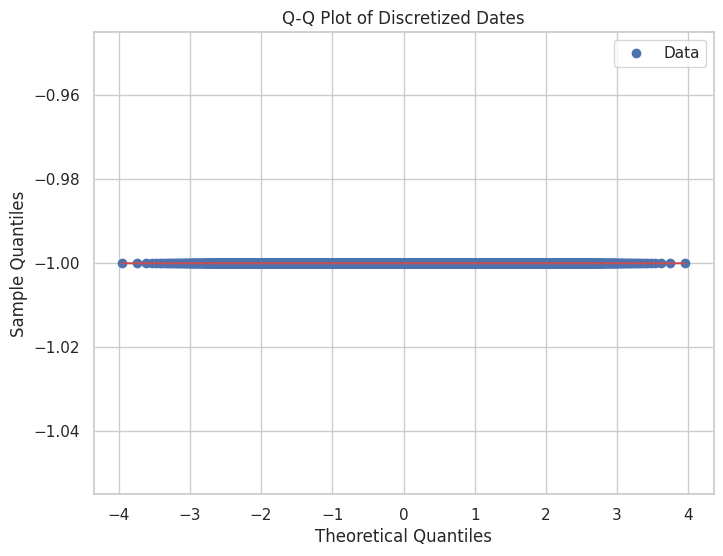

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
data = pd.read_csv("avocado.csv")  # Replace with the actual dataset file path

# Define the concept hierarchy for Date
concept_hierarchy = {
    2015: 'Old',
    2016: 'Old',
    2017: 'New',
    2018: 'Recent'
}

# Discretize the "Date" attribute based on the concept hierarchy
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.year.map(concept_hierarchy)
#print(data['Date'] )
# Replace NaN values in "Date" with the concept hierarchy values
data['Date'].fillna(value=concept_hierarchy[2015], inplace=True)

plt.figure(figsize=(8, 6))
stats.probplot(df['Date'].cat.codes, plot=plt)
plt.title('Q-Q Plot of Discretized Dates')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.legend(['Data'])
plt.show()